In [68]:
import pandas as pd

In [69]:
df=pd.read_csv("customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [70]:
df.isna().sum().sum()

0

In [71]:
df.duplicated().sum()

0

In [72]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [73]:
numeric_columns_data=df.select_dtypes(include=["number"])

In [74]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [75]:
import matplotlib.pyplot as plt

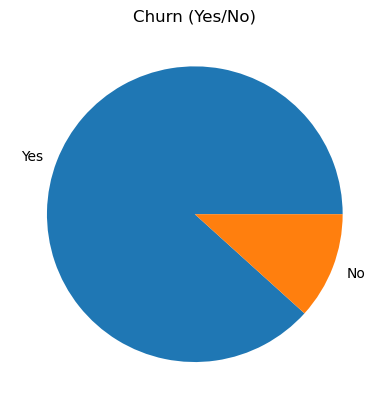

In [76]:
df["Churn"].value_counts().plot(kind='pie')
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [77]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [78]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [79]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [80]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

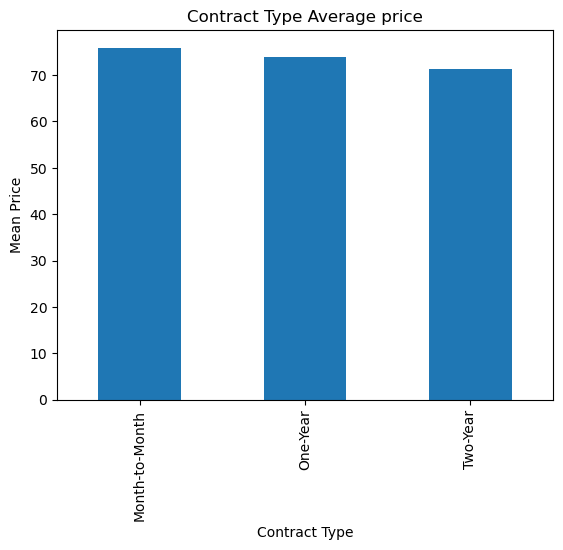

In [81]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar')
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average price")
plt.show()

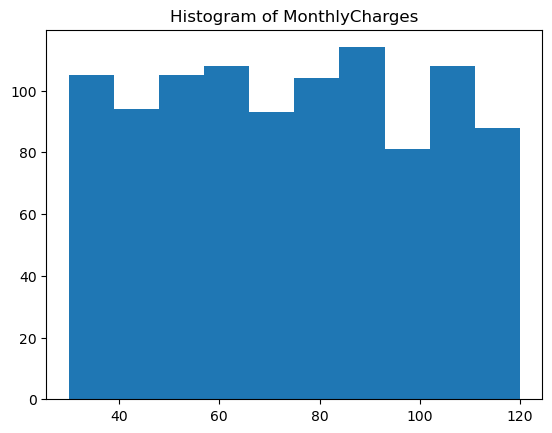

In [82]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of MonthlyCharges")
plt.show()

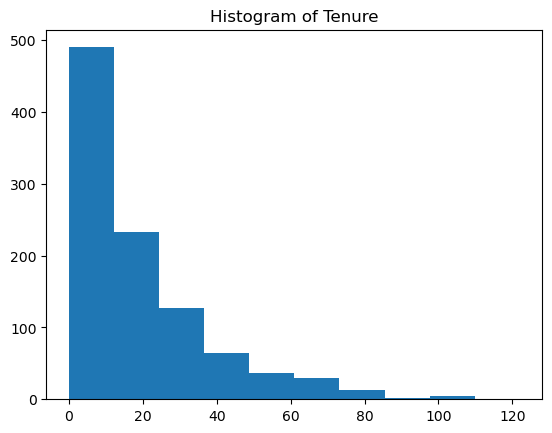

In [83]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

### Feature Selection

In [84]:
y = df[["Churn"]]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [85]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [86]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [87]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [88]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [89]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [90]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
X_train = scaler.fit_transform(X_train)

In [95]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [96]:
X_test = scaler.fit_transform(X_test)

In [97]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,prediction)))

In [98]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log_model = LogisticRegression()

In [101]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred = log_model.predict(X_test)

In [104]:
modelperformance(y_pred)

Accuracy score on model is 0.875


### K Nearnest Neighbor Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"]
}

In [107]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [108]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [109]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [110]:
y_pred = gridkn.predict(X_test)

In [111]:
modelperformance(y_pred)

Accuracy score on model is 0.86


### Support Vector Machine

In [112]:
from sklearn.svm import SVC
svm = SVC()

In [113]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [114]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [115]:
gridsvc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [116]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [117]:
y_pred = gridsvc.predict(X_test)

In [118]:
modelperformance(y_pred)

Accuracy score on model is 0.88


### Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" :["best","Random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [121]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [122]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'Random']})

In [123]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [124]:
y_pred = grid_tree.predict(X_test)

In [125]:
modelperformance(y_pred)

Accuracy score on model is 0.835


### Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [127]:
param_grid = {
    "n_estimators" : [32,64,120,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [128]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [129]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 120, 256]})

In [130]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [131]:
y_pred = grid_rfc.predict(X_test)

In [132]:
modelperformance(y_pred)

Accuracy score on model is 0.83


In [133]:
best_model = gridsvc.best_estimator_

In [134]:
joblib.dump(best_model,"model.pkl")

['model.pkl']